# R Visualizations

In [1]:
library(shiny)
library(ggplot2)
library(rsconnect)


Attaching package: ‘rsconnect’

The following object is masked from ‘package:shiny’:

    serverInfo



# ggplot2

### histogram

In [2]:
# dataset
data=data.frame(value=rnorm(10000))

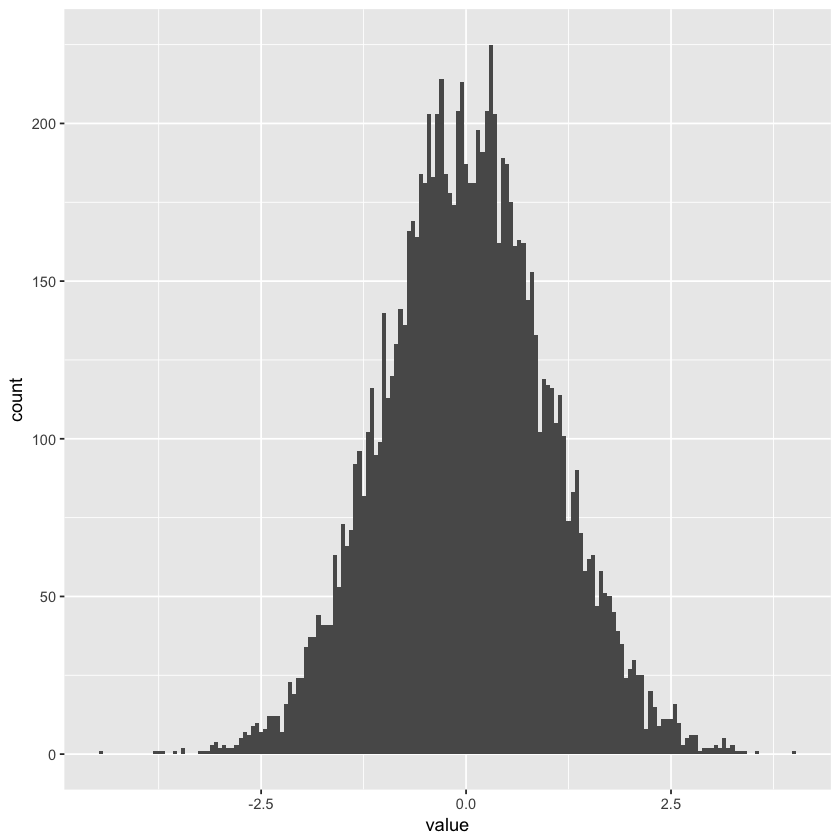

In [3]:
# basic histogram
ggplot(data, aes(x=value)) + geom_histogram(binwidth = 0.05)

### scatter plot

In [4]:
# data
data=data.frame(cond = rep(c("condition_1", "condition_2"), each=10), my_x = 1:100 + rnorm(100,sd=9), my_y = 1:100 + rnorm(100,sd=16) )

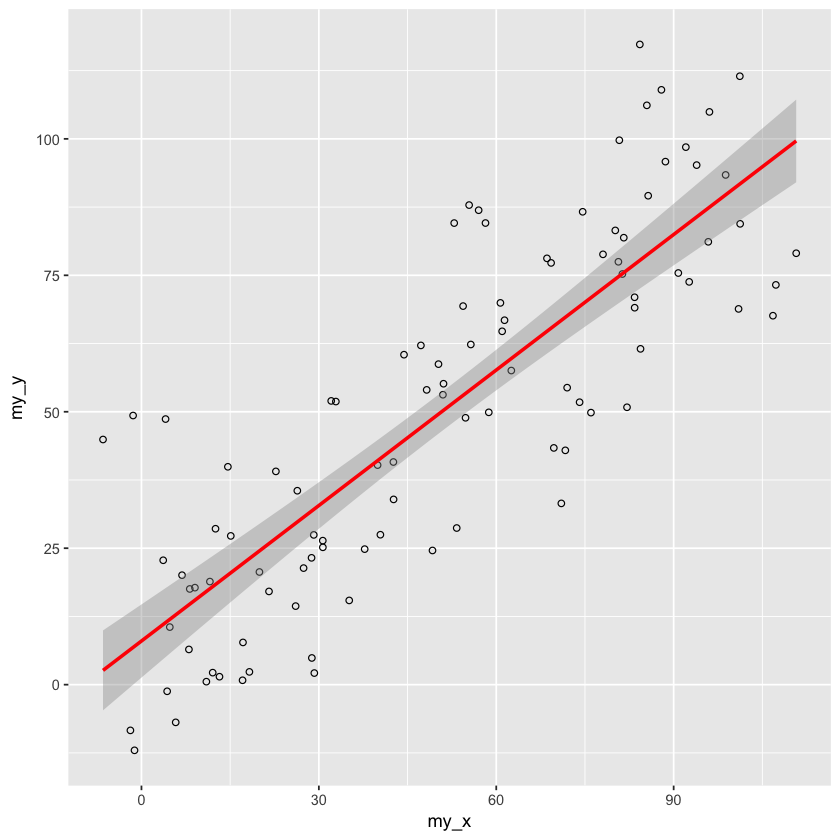

In [5]:
# scatter plot with linear trend with confidence interval
ggplot(data, aes(x=my_x, y=my_y)) + geom_point(shape=1) +  geom_smooth(method=lm , color="red", se=TRUE)

### boxplot

In [6]:
# data
data <- mpg

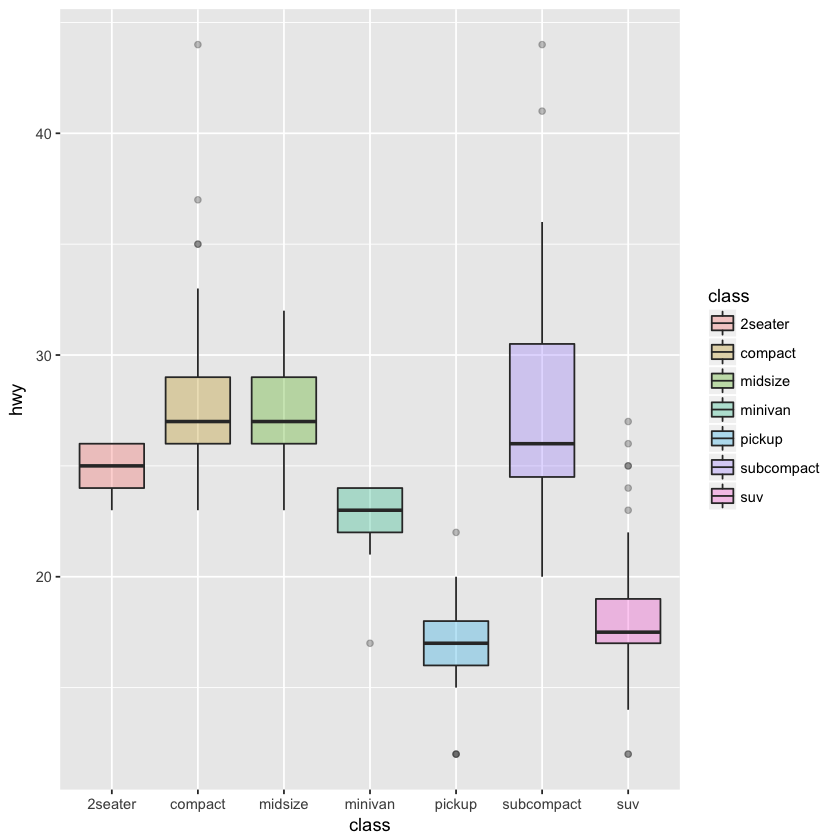

In [7]:
# boxplot
ggplot(data, aes(x=class, y=hwy, fill=class)) + 
    geom_boxplot(alpha=0.3) 

# Shiny

### ui

In [112]:
ui <- fluidPage(
  titlePanel("Basic DataTable"),

  # Create a new Row in the UI for selectInputs
  fluidRow(
    column(4,
        selectInput("man",
                    "Manufacturer:",
                    c("All",
                      unique(as.character(mpg$manufacturer))))
    ),
    column(4,
        selectInput("trans",
                    "Transmission:",
                    c("All",
                      unique(as.character(mpg$trans))))
    ),
    column(4,
        selectInput("cyl",
                    "Cylinders:",
                    c("All",
                      unique(as.character(mpg$cyl))))
    )
  ),
  # Create a new row for the table.
  fluidRow(
    DT::dataTableOutput("table")
  )
)

### server

In [113]:
server <- function(input, output) {

  # Filter data based on selections
  output$table <- DT::renderDataTable(DT::datatable({
    data <- mpg
    if (input$man != "All") {
      data <- data[data$manufacturer == input$man,]
    }
    if (input$cyl != "All") {
      data <- data[data$cyl == input$cyl,]
    }
    if (input$trans != "All") {
      data <- data[data$trans == input$trans,]
    }
    data
  }))

}

In [114]:
# server <- function(input, output) {
#     data <-reactive({mpg
#                       if (input$man != "All") {mpg <- mpg[mpg$manufacturer == input$man,]}
#                       if (input$cyl != "All") {mpg <- mpg[mpg$cyl == input$cyl,]}
#                       if (input$trans != "All") {mpg <- mpg[mpg$trans == input$trans,]}
#                       mpg})
#   # Filter data based on selections
#   output$table <- DT::renderDataTable(DT::datatable({data}))

# }

### load

In [ ]:
# load
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:3003
